## Application Launch

### Setup PythonNet bridge to connect with FlaUI Dll's

In [2]:
import PIL.ImageGrab
from flaui.lib.pythonnet_bridge import setup_pythonnet_bridge

setup_pythonnet_bridge()

2022-05-02 20:09:35.640 | INFO     | flaui.lib.pythonnet_bridge:setup_pythonnet_bridge:21 - Added FlaUI.Core DLL from C:\Users\amrut\PythonProjects\flaui-uiautomation-wrapper\flaui\bin\FlaUI.Core.dll to PythonNet bridge
2022-05-02 20:09:35.683 | INFO     | flaui.lib.pythonnet_bridge:setup_pythonnet_bridge:21 - Added FlaUI.UIA2 DLL from C:\Users\amrut\PythonProjects\flaui-uiautomation-wrapper\flaui\bin\FlaUI.UIA2.dll to PythonNet bridge
2022-05-02 20:09:35.704 | INFO     | flaui.lib.pythonnet_bridge:setup_pythonnet_bridge:21 - Added FlaUI.UIA3 DLL from C:\Users\amrut\PythonProjects\flaui-uiautomation-wrapper\flaui\bin\FlaUI.UIA3.dll to PythonNet bridge
2022-05-02 20:09:35.710 | INFO     | flaui.lib.pythonnet_bridge:setup_pythonnet_bridge:21 - Added Interop.UIAutomationClient DLL from C:\Users\amrut\PythonProjects\flaui-uiautomation-wrapper\flaui\bin\Interop.UIAutomationClient.dll to PythonNet bridge


### Import FlaUI dependencies

In [2]:
from FlaUI.UIA3 import UIA3Automation
from FlaUI.Core import Application
from FlaUI.Core.Definitions import ControlType

automation = UIA3Automation()

### Launch notepad application and print PID

Application PID - 1860


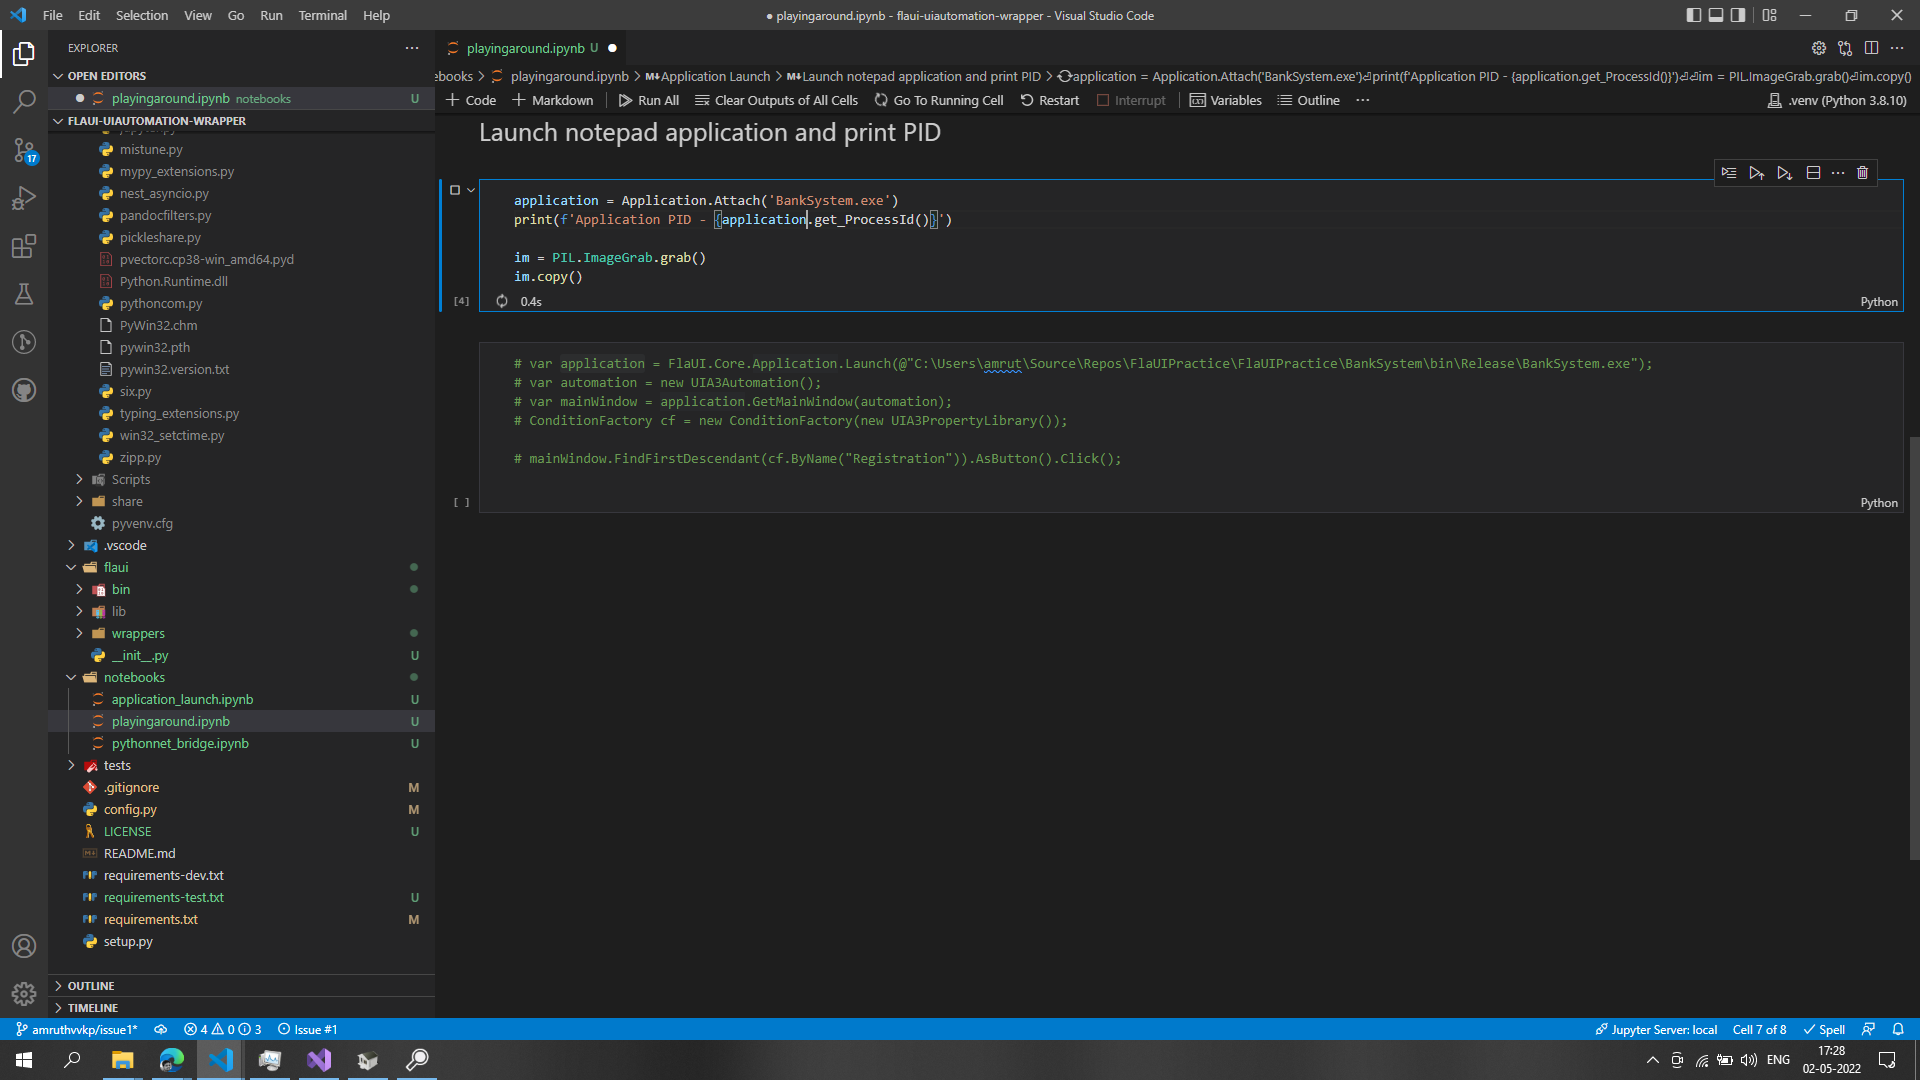

In [4]:
application = Application.Attach('BankSystem.exe')
print(f'Application PID - {application.get_ProcessId()}')

im = PIL.ImageGrab.grab()
im.copy()

In [6]:
# var application = FlaUI.Core.Application.Launch(@"C:\Users\amrut\Source\Repos\FlaUIPractice\FlaUIPractice\BankSystem\bin\Release\BankSystem.exe");
# var automation = new UIA3Automation();
# var mainWindow = application.GetMainWindow(automation);
# ConditionFactory cf = new ConditionFactory(new UIA3PropertyLibrary());

# mainWindow.FindFirstDescendant(cf.ByName("Registration")).AsButton().Click();
cf = automation.ConditionFactory

main_window = application.GetMainWindow(automation)
element = main_window.FindFirstDescendant(cf.ByName('Registration'))


In [10]:
element.Click()

In [16]:
import FlaUI.Core.Conditions
from FlaUI.Core.Conditions import AndCondition

In [26]:
registration_window = main_window.FindFirstDescendant(cf.ByName('Registration').And(cf.ByAutomationId('Registration')))

In [48]:
# var elements = mainWindow.FindAllDescendants(cf.ByName("First Name :").And(cf.ByControlType(FlaUI.Core.Definitions.ControlType.Edit)));
element = registration_window.FindFirstDescendant(cf.ByName('Age :').And(cf.ByControlType(ControlType.ComboBox)))

In [40]:
element.SetFocus()
element.Click()

In [9]:
from flaui.robot.keywords.application import ApplicationKeywords
from flaui.robot.automation.uia3 import UIA3

uia = UIA3()
app_keywords = ApplicationKeywords(uia)

In [10]:
app_keywords.attach_application_by_name('BankSystem.exe')

1860

In [11]:
from flaui.robot.keywords.element import ElementKeywords

element_keywords = ElementKeywords(uia)

In [16]:
element_keywords.element_should_be_visible('/Window/Window/Pane[2]/ComboBox[1]')